<a href="https://colab.research.google.com/github/rsrijana/Journey-Journal/blob/master/Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [2]:
# Check for missing values
data.isnull().sum()

# Fill missing values for 'Age' with the median age
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Survived'].fillna(data['Survived'].median(), inplace=True)

# Drop the 'Cabin' column due to high number of missing values
data.drop(columns=['Parents/Children Aboard'], inplace=True)

# Drop rows with missing 'Fare' values
data.dropna(subset=['Fare'], inplace=True)
print(data)

     Survived  Pclass                                               Name  \
0           0       3                             Mr. Owen Harris Braund   
1           1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2           1       3                              Miss. Laina Heikkinen   
3           1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4           0       3                            Mr. William Henry Allen   
..        ...     ...                                                ...   
882         0       2                               Rev. Juozas Montvila   
883         1       1                        Miss. Margaret Edith Graham   
884         0       3                     Miss. Catherine Helen Johnston   
885         1       1                               Mr. Karl Howell Behr   
886         0       3                                 Mr. Patrick Dooley   

        Sex   Age  Siblings/Spouses Aboard     Fare  
0      male  22.0                

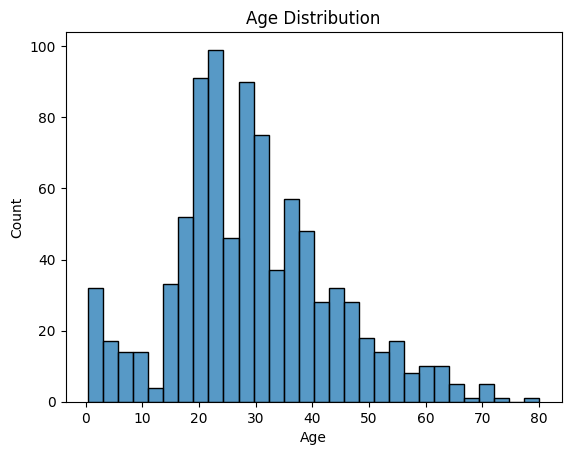

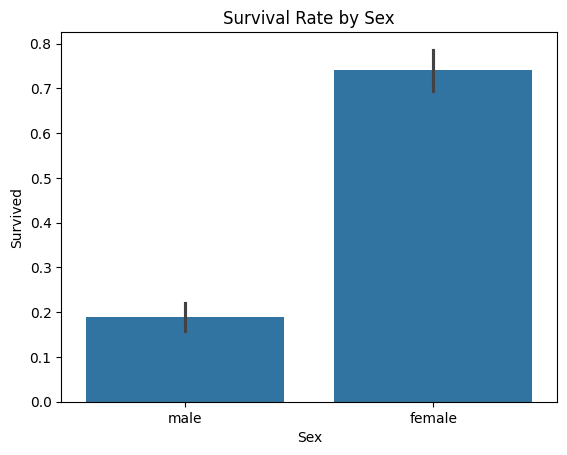

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis
sns.histplot(data['Age'], bins=30)
plt.title('Age Distribution')
plt.show()

# Bivariate Analysis
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Sex')
plt.show()

# Multivariate Analysis
# sns.heatmap(data.corr(), annot=True)
# plt.title('Correlation Matrix')
# plt.show()


In [4]:
data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,30.0000


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Feature Selection
features = ['Pclass', 'Sex_male', 'Age', 'Siblings/Spouses Aboard', 'Fare']
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)

X = data[features]
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.78
